In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from matplotlib import style 

"""
1.  fLength:  continuous  -  major axis of ellipse [mm]
2.  fWidth:   continuous  - minor axis of ellipse [mm] 
3.  fSize:    continuous  - 10-log of sum of content of all pixels [in #phot]
4.  fConc:    continuous  - ratio of sum of two highest pixels over fSize  [ratio]
5.  fConc1:   continuous  - ratio of highest pixel over fSize  [ratio]
6.  fAsym:    continuous  - distance from highest pixel to center, projected onto major axis [mm]
7.  fM3Long:  continuous  - 3rd root of third moment along major axis  [mm] 
8.  fM3Trans: continuous  - 3rd root of third moment along minor axis  [mm]
9.  fAlpha:   continuous  - angle of major axis with vector to origin [deg]
10.  fDist:    continuous  - distance from origin to center of ellipse [mm]
11.  class:    g,h  - gamma (signal), hadron (background)
"""

## Data Cleaning

In [5]:
df = pd.read_csv("C:/Users/USER/Desktop/new_data_set/telescope_data.csv")

In [6]:
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [7]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [8]:
df["fclass"] = pd.get_dummies(df["class"], drop_first=True)

In [9]:
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,fclass
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g,0
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g,0
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g,0
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g,0
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g,0


In [10]:
df.drop(columns=["Unnamed: 0", "class"], inplace=True)

In [11]:
df.groupby("fclass").size()

fclass
0    12332
1     6688
dtype: int64

In [12]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,fclass
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  fclass    19020 non-null  uint8  
dtypes: float64(10), uint8(1)
memory usage: 1.5 MB


## Statistical Information

In [14]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,fclass
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.351630
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,0.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [15]:
df.skew()

fLength     2.013652
fWidth      3.371628
fSize       0.875507
fConc       0.485888
fConc1      0.685695
fAsym      -1.046441
fM3Long    -1.123078
fM3Trans    0.120121
fAlpha      0.850890
fDist       0.229587
fclass      0.621522
dtype: float64

In [16]:
df.corr()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,fclass
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466,0.307572
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816,0.265596
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041,0.117795
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332,-0.024615
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625,-0.004797
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730,-0.173587
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025,-0.193409
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427,0.003837
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556,0.460979
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000,0.065203


## Data Visualisation

In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [18]:
plt.style.use("ggplot")

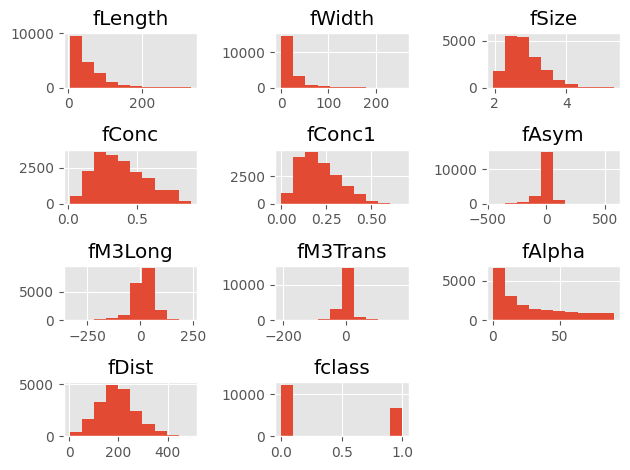

In [19]:
df.hist()
plt.tight_layout()

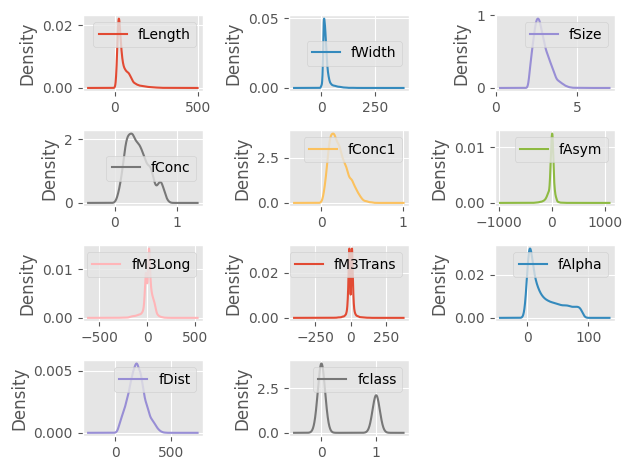

In [20]:
df.plot(kind="density", subplots=True, layout=(4, 3), sharex=False)
plt.tight_layout()

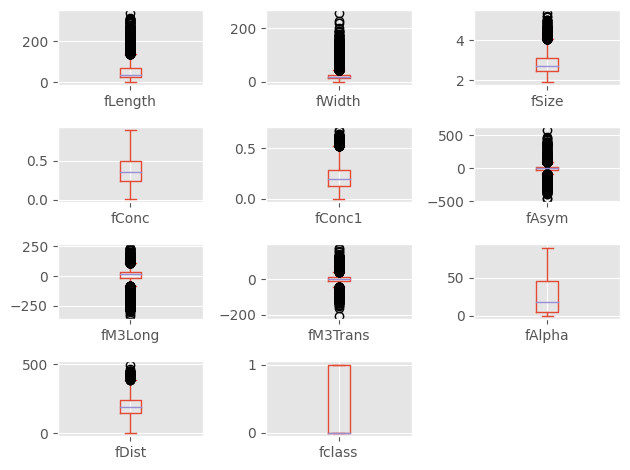

In [21]:
df.plot(kind="box", subplots=True, layout=(4,3), sharex=False)
plt.tight_layout()

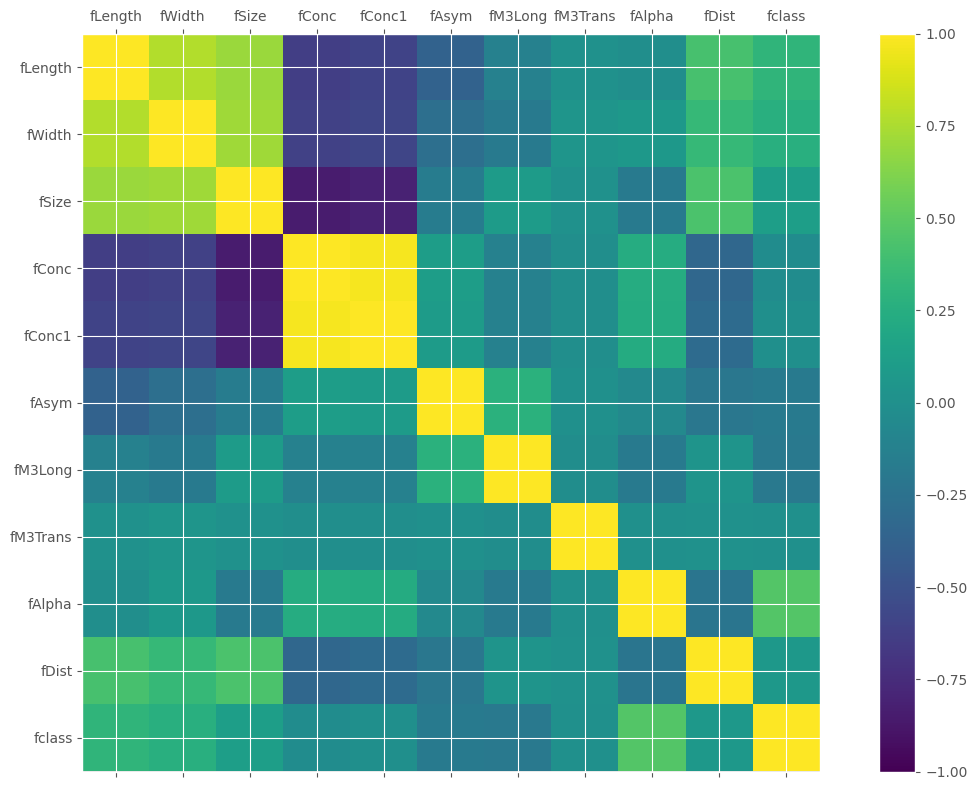

In [22]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.tight_layout()

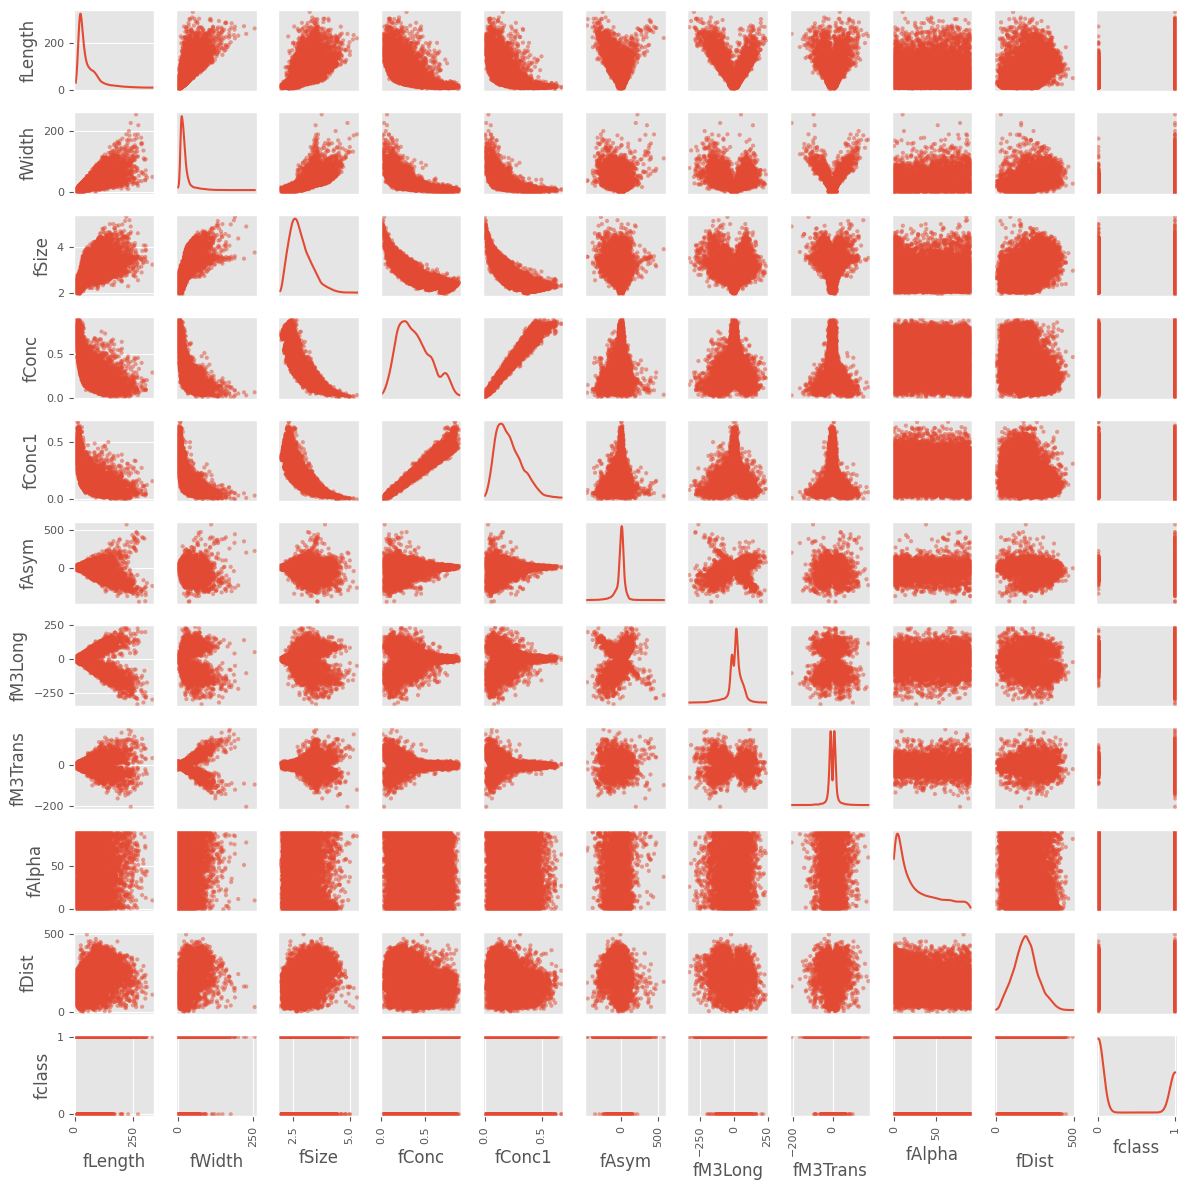

In [23]:
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(12, 12), diagonal='kde')
plt.tight_layout()

## Preprocessing

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [32]:
X = df.values[:, :10]
y = df.values[:, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

## Feature selection

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
from sklearn.feature_selection import f_classif

In [35]:
array = df.values
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
print(fit.scores_)

[1.98709656e+03 1.44337547e+03 2.67598593e+02 1.15294984e+01
 4.37687108e-01 5.90864824e+02 7.39053298e+02 2.80026848e-01
 5.13190264e+03 8.11980171e+01]


In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [39]:
rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=3)
fit = rfe.fit(X, y)
print(f"Num Features: {fit.n_features_}")
print(f"Selected Features: {fit.support_}")
print(f"Feature Ranking: {fit.ranking_}")

Num Features: 3
Selected Features: [False False  True  True  True False False False False False]
Feature Ranking: [3 5 1 1 1 8 4 6 2 7]


In [38]:
from sklearn.decomposition import PCA

#### Principal Component Analysis

In [40]:
pca = PCA(n_components=3, random_state=42)
fit = pca.fit(X)
print(f"Explained Variance {fit.explained_variance_ratio_}")
print(fit.components_)

Explained Variance [0.44047283 0.25799074 0.1349833 ]
[[ 3.27812305e-01  1.13810001e-01  3.06076690e-03 -9.27109146e-04
  -5.21882399e-04 -3.80700011e-01 -7.16522956e-02  3.37405774e-03
  -5.35411190e-02  8.52426707e-01]
 [ 1.34406332e-01  5.38837224e-02 -6.59372017e-04  2.58205308e-04
   1.52710005e-04 -6.93897410e-01 -5.62620169e-01  1.03235567e-03
   1.18351409e-01 -4.08641365e-01]
 [-6.55078481e-02  1.89938175e-02 -1.05931761e-03  5.10399700e-04
   2.94635944e-04  5.40076835e-01 -8.13121108e-01  1.24715329e-02
   5.31065391e-02  1.98800703e-01]]


In [41]:
result = pca.transform(X)

In [42]:
np.random.seed(42)
small_result_1 = np.random.choice(result[:, 0], size=500, replace=False)
np.random.seed(42)
small_result_2 = np.random.choice(result[:, 1], size=500, replace=False)
np.random.seed(42)
small_result_3 = np.random.choice(result[:, 2], size=500, replace=False)
np.random.seed(42)
small_key = np.random.choice(y, size=500, replace=False)

Text(0, 0.5, 'Component 3')

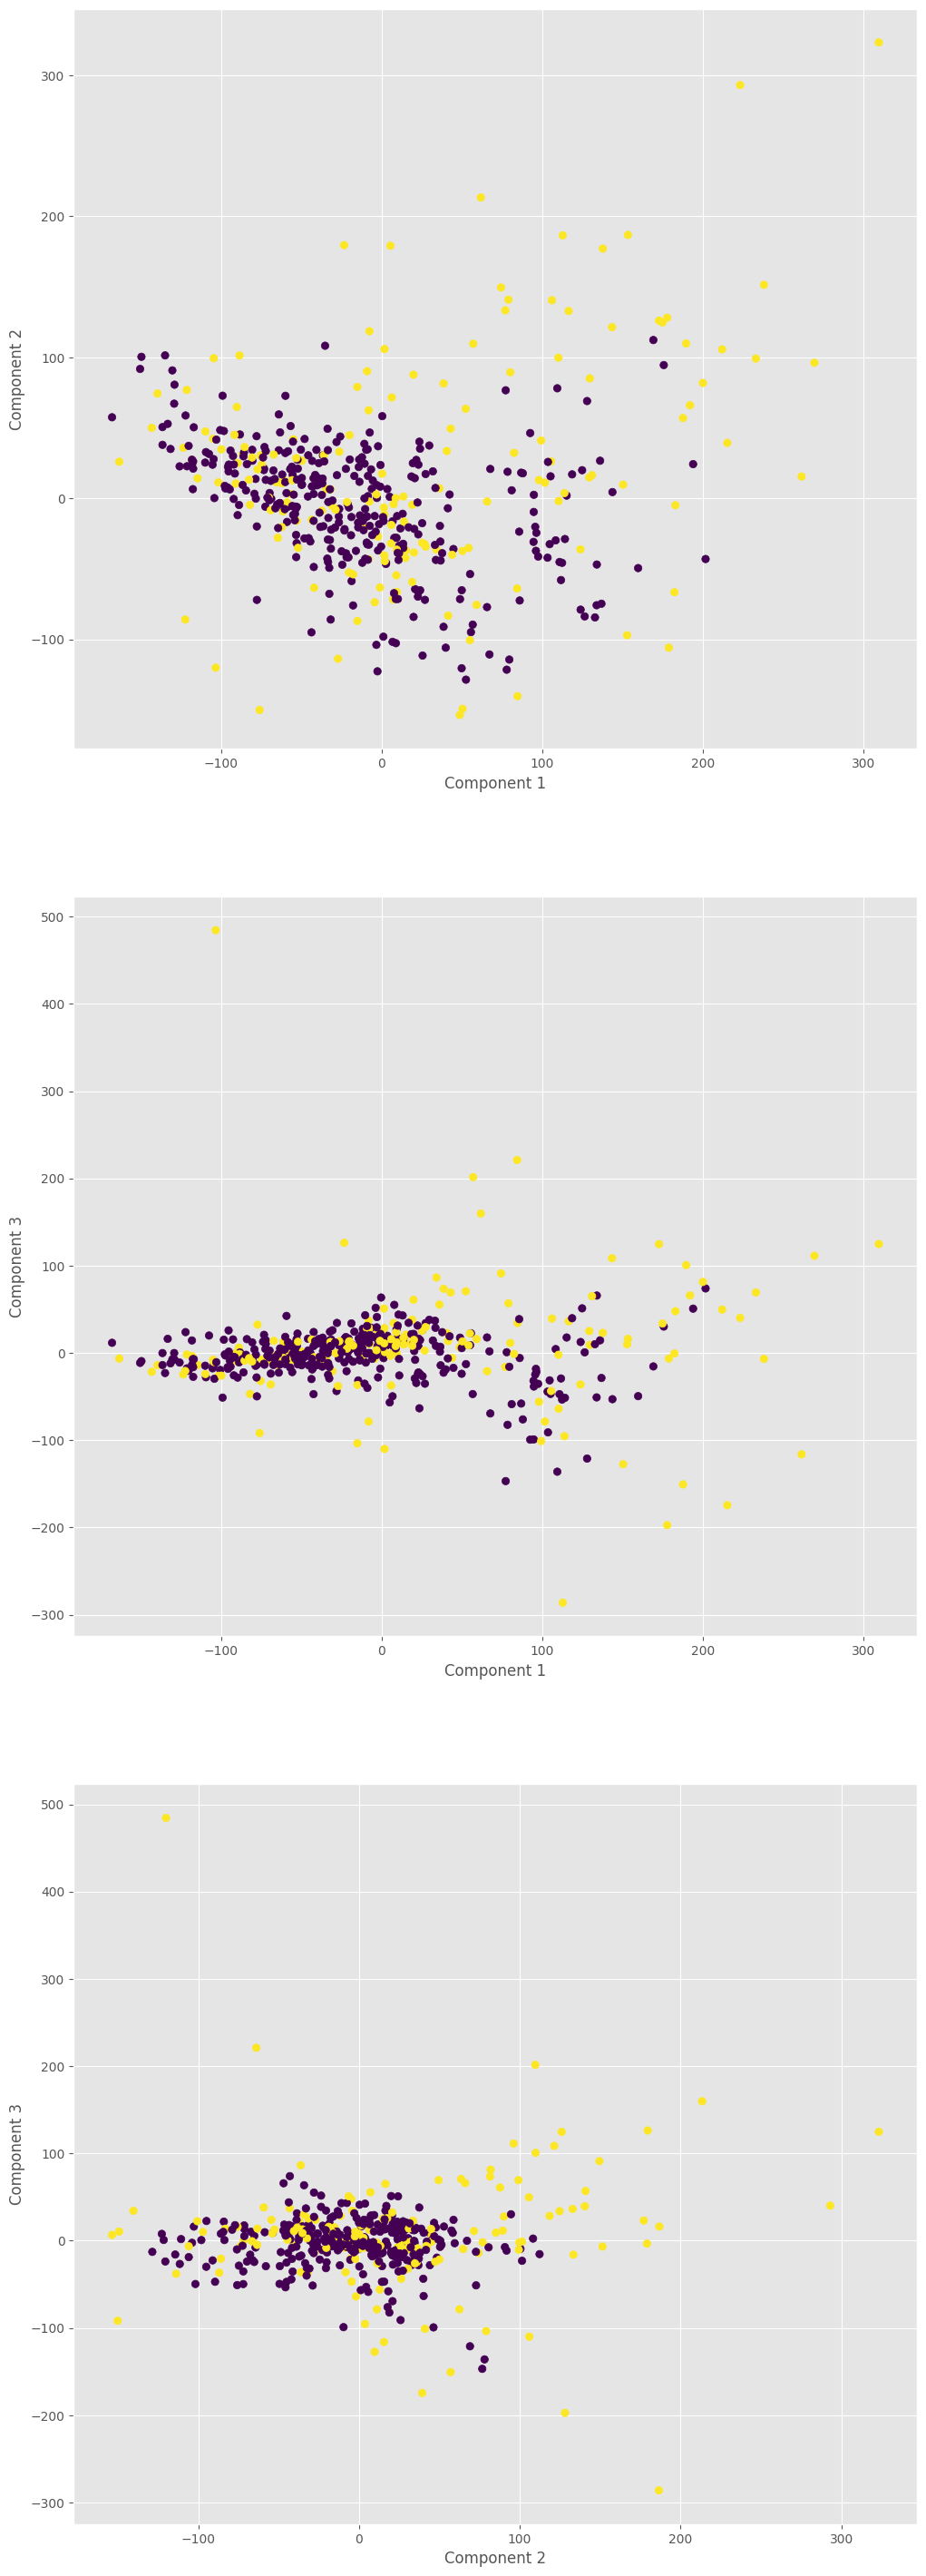

In [79]:
fig = plt.figure(figsize=(12, 36))
ax1 = fig.add_subplot(311)
plt.scatter(small_result_1, small_result_2, c=small_key)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
ax2 = fig.add_subplot(312)
plt.scatter(small_result_1, small_result_3, c=small_key)
plt.xlabel("Component 1")
plt.ylabel("Component 3")
ax3 = fig.add_subplot(313)
plt.scatter(small_result_2, small_result_3, c=small_key)
plt.xlabel("Component 2")
plt.ylabel("Component 3")


The big hope of the PCA was to find 2 distinct clusters that corresponded to both classes but that didn't happen.
PCA shows that there is a clear division at the edges of the domain, although towards the centre of the cluster it becomes more difficult to differentiate between the different classes.

## Model Selection

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

pred = log_model.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)

[[2032  428]
 [ 364  980]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      2460
         1.0       0.70      0.73      0.71      1344

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

pred = lda.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)

[[2077  383]
 [ 404  940]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      2460
         1.0       0.71      0.70      0.70      1344

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



from sklearn.neighbors import KNeighborsClassifier

k_means_models = []
for i in range(1, 31):
    k_means = KNeighborsClassifier(i)
    k_means.fit(X_train, y_train)

    pred = k_means.predict(X_test)
    k_means_models.append(k_means)
    con_mat = confusion_matrix(y_test, pred)
    class_rep = classification_report(y_test, pred)

    print(f"N_Neigbors = {i}")
    print(con_mat)
    print(class_rep)

Of the different parameters tested for K Nearest Neighbors, around 15 Neighbors seemed to give a good result

In [52]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

pred = nb.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)


[[2215  245]
 [ 806  538]]
              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81      2460
         1.0       0.69      0.40      0.51      1344

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)


[[2106  354]
 [ 359  985]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      2460
         1.0       0.74      0.73      0.73      1344

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [55]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)


[[2225  235]
 [ 281 1063]]
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      2460
         1.0       0.82      0.79      0.80      1344

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### Ensembles

In [56]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()
bag.fit(X_train, y_train)

pred = bag.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)

[[2265  195]
 [ 319 1025]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      2460
         1.0       0.84      0.76      0.80      1344

    accuracy                           0.86      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)

[[2278  182]
 [ 289 1055]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      2460
         1.0       0.85      0.78      0.82      1344

    accuracy                           0.88      3804
   macro avg       0.87      0.86      0.86      3804
weighted avg       0.88      0.88      0.87      3804



In [58]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

pred = etc.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)

[[2344  116]
 [ 349  995]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2460
         1.0       0.90      0.74      0.81      1344

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804



In [59]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

pred = abc.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)

[[2002  458]
 [ 270 1074]]
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.85      2460
         1.0       0.70      0.80      0.75      1344

    accuracy                           0.81      3804
   macro avg       0.79      0.81      0.80      3804
weighted avg       0.82      0.81      0.81      3804



In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

pred = gbc.predict(X_test)
con_mat = confusion_matrix(y_test, pred)
class_rep = classification_report(y_test, pred)

print(con_mat)
print(class_rep)

[[2184  276]
 [ 266 1078]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2460
         1.0       0.80      0.80      0.80      1344

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



Of the models used, Random Forests and Support Vector Machines seemed to have the best result.

In [81]:
import joblib

In [82]:
joblib.dump(svm, "finalized_svm_gamma.sav")
joblib.dump(rfc, "finalized_rfc_gamma.sav")

['finalized_rfc_gamma.sav']